### AUTHOR : SUBHAM TEWARI

ALL COPYRIGHTS RESERVED

So in this mini project I will be working with the Movielens dataset.

The **research question** which I will answer is whether Thriller movies are rated higher than the movies of other genre

The movielens dataset can be downloaded from the link- https://grouplens.org/datasets/movielens/



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Take input the movie csv file through pandas

movies=pd.read_csv('./movielens/movies.csv',sep=',')
print(type(movies))

<class 'pandas.core.frame.DataFrame'>


In [4]:
# Take input the tag csv file through pandas

tags=pd.read_csv('./movielens/tags.csv',sep=',')
print(type(tags))

<class 'pandas.core.frame.DataFrame'>


In [5]:
# Take input the ratings csv file through pandas

ratings=pd.read_csv('./movielens/ratings.csv',sep=',')
print(type(ratings))

<class 'pandas.core.frame.DataFrame'>


Now we will merge the movie.csv and the ratings.csv with the movieid key and the join will be inner

But before that we will do **data cleaning** of the dataset

In [6]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [7]:
tags.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [8]:
tags=tags.dropna()

In [9]:
tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

So we can see that there is no longer a null value in the tags dataset as we have dropped the rows which contained null values

In [10]:
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

So we have done the data cleaning of our dataset.

In [11]:
# Now we are creating a table called average_rating to compute the average(mean) rating of each movie based on the ratings the user gives
average_rating=ratings[['movieId','rating']].groupby('movieId',as_index=False).mean()
average_rating.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [12]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
# Now we are merging movies and average_rating on the key 'movieId' and the join will be inner
box_office=movies.merge(average_rating,on='movieId',how='inner')
box_office.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592


In [14]:
# Now we are checking for the movies which are in thriller genre
is_thriller = box_office['genres'].str.contains('Thriller')
print(len(is_thriller))
thriller=box_office[is_thriller]
thriller.head()

26744


,movieId,title,genres,rating
5,6,Heat (1995),Action|Crime|Thriller,3.834930
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.430029
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller,2.880754
20,21,Get Shorty (1995),Comedy|Crime|Thriller,3.581689
21,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,3.319400


In [15]:
# Now we are creating a new column named year and we are extracting the dates from the title column in thriller table
thriller['year'] = thriller['title'].str.extract('.*\((.*)\).*', expand=False)
thriller.head()

/usr/lib/python3/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,movieId,title,genres,rating,year
5,6,Heat (1995),Action|Crime|Thriller,3.834930,1995
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.430029,1995
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller,2.880754,1995
20,21,Get Shorty (1995),Comedy|Crime|Thriller,3.581689,1995
21,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,3.319400,1995


In [16]:
#Now we are calculating the average ratings of all the movies in a year based on the user ratings
yearly_rating=thriller[['year','rating']].groupby('year',as_index=False).mean()
yearly_rating.head()

,year,rating
0,1915,3.433333
1,1916,3.500000
2,1921,3.500000
3,1922,3.619048
4,1924,3.216869


In [17]:
# We can see that we have 96 years of data 
years = yearly_rating['year'].unique().tolist()
len(years)

96

In [18]:
# The 96th index contained garbage value so it is removed or sliced
yearly_rating=yearly_rating.drop(yearly_rating.index[95])

In [19]:
# Now we are converting the values of the year column from string to integer
cols=[i for i in yearly_rating.columns if i not in ["rating"]]
for col in cols:
    yearly_rating[col]=pd.to_numeric(yearly_rating[col])

In [20]:
# The values of some years were missing before 1926 so we are slicing it off and starting the table from 1926
final=yearly_rating['year']>=1926
final_rating=yearly_rating[final]
final_rating.head()

,year,rating
5,1926,3.500000
6,1927,3.583333
7,1928,3.409091
8,1929,3.507812
9,1930,3.476728


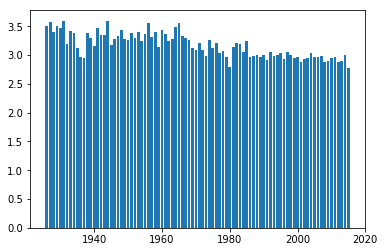

Text(0.5,0,'Years')

In [21]:
# Now we are plotting the graph with x axis as years and y axis as ratings
year=final_rating['year'].values
thrill=final_rating['rating'].values
plt.bar(year,thrill) 
plt.show()
plt.ylabel('ratings')
plt.xlabel('Years')

So this graph shows the yearly average rating of thriller movies from the year 1926 to 2015

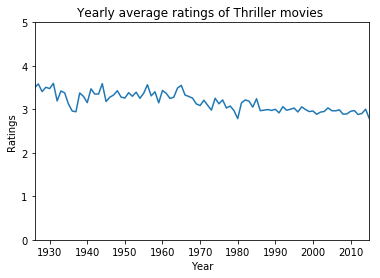

In [22]:
# switch to a line plot
plt.plot(final_rating['year'].values, final_rating['rating'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel('Ratings')

#label the figure
plt.title('Yearly average ratings of Thriller movies ')

# to make more honest, start they y axis at 0
plt.axis([1926, 2015,0,5])

plt.show()

So you can see the line plot of the yearly average of ratings in thriller movies

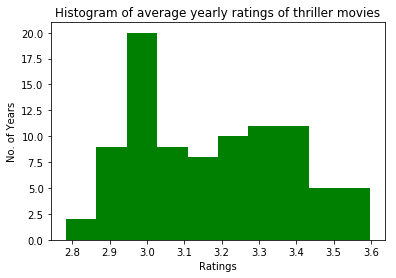

In [23]:
# If you want to just include those within one standard deviation fo the mean, you could do the following
# lower = stage['Value'].mean() - stage['Value'].std()
# upper = stage['Value'].mean() + stage['Value'].std()
# hist_data = [x for x in stage[:10000]['Value'] if x>lower and x<upper ]

# Otherwise, let's look at all the data
hist_data = final_rating['rating'].values
# the histogram of the data
plt.hist(hist_data, 10, normed=False, facecolor='green')

plt.xlabel('Ratings')
plt.ylabel('No. of Years')
plt.title('Histogram of average yearly ratings of thriller movies')

plt.grid(False)

plt.show()

So with this histogram we can see that most user gave 2.9-3.0 ratings for thriller movies

In [24]:
# We are computing the all time average of all the thriller movies that are in the dataset
final_rating['rating'].mean(axis=0)

3.1718188696914802

So we can see that the **average rating of thriller movies** from the year 1926 to 2015 (89 years) is 3.1718188696914802

Now our task is to compute the **average of ratings** of all the other categories of movies

In [25]:
box_office.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592


In [26]:
isnot_thriller = box_office['genres'].str.contains('Thriller')== False
others=box_office[isnot_thriller]
others.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592


In [27]:
# Now we are creating a new column named year and we are extracting the dates from the title column in thriller table
others['year'] = others['title'].str.extract('.*\((.*)\).*', expand=False)
others.head()

/usr/lib/python3/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,movieId,title,genres,rating,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,1995
4,5,Father of the Bride Part II (1995),Comedy,3.064592,1995


In [28]:
#Now we are calculating the average ratings of all the movies in a year based on the user ratings
yearly_rating_others=others[['year','rating']].groupby('year',as_index=False).mean()
yearly_rating_others=yearly_rating_others.drop(yearly_rating_others.index[122]) # The 122th index contained garbage value so it is removed or sliced
yearly_rating_others=yearly_rating_others.drop(yearly_rating_others.index[78]) 
yearly_rating_others=yearly_rating_others.drop(yearly_rating_others.index[86]) 
yearly_rating_others=yearly_rating_others.drop(yearly_rating_others.index[110]) 
yearly_rating_others=yearly_rating_others.drop(yearly_rating_others.index[112]) 
yearly_rating_others.head()

,year,rating
0,1891,3.000000
1,1893,3.375000
2,1894,3.071429
3,1895,3.125000
4,1896,3.183036


In [29]:
# Now we are converting the values of the year column from string to integer
cols=[i for i in yearly_rating_others.columns if i not in ["rating"]]
for col in cols:
    yearly_rating_others[col]=pd.to_numeric(yearly_rating_others[col])

In [30]:
# The values of some years were missing before 1926 so we are slicing it off and starting the table from 1926
final=yearly_rating_others['year']>=1926
final_rating_others=yearly_rating_others[final]
final_rating_others.head()

,year,rating
28,1926,3.372142
29,1927,3.336091
30,1928,3.398611
31,1929,3.301901
32,1930,3.093193


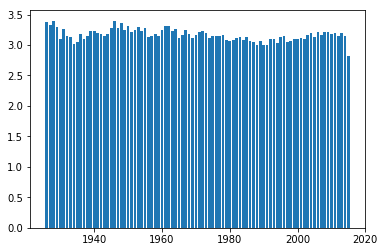

Text(0.5,0,'Years')

In [31]:
# Now we are plotting the graph with x axis as years and y axis as ratings
year=final_rating_others['year'].values
not_thrill=final_rating_others['rating'].values
plt.bar(year,not_thrill) 
plt.show()
plt.ylabel('ratings')
plt.xlabel('Years')

So this graph shows the yearly average rating of thriller movies from the year 1926 to 2015

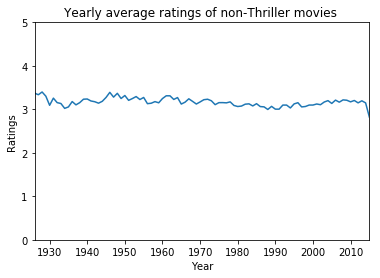

In [32]:
# switch to a line plot
plt.plot(final_rating_others['year'].values, final_rating_others['rating'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel('Ratings')

#label the figure
plt.title('Yearly average ratings of non-Thriller movies ')

# to make more honest, start they y axis at 0
plt.axis([1926, 2015,0,5])

plt.show()

So you can see the line plot of the yearly average of ratings in non-thriller movies

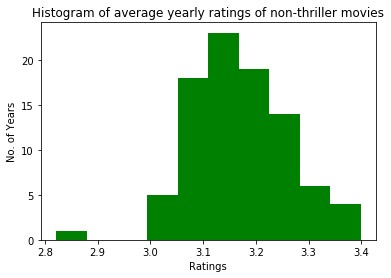

In [33]:
# If you want to just include those within one standard deviation fo the mean, you could do the following
# lower = stage['Value'].mean() - stage['Value'].std()
# upper = stage['Value'].mean() + stage['Value'].std()
# hist_data = [x for x in stage[:10000]['Value'] if x>lower and x<upper ]

# Otherwise, let's look at all the data
hist_data = final_rating_others['rating'].values
# the histogram of the data
plt.hist(hist_data, 10, normed=False, facecolor='green')

plt.xlabel('Ratings')
plt.ylabel('No. of Years')
plt.title('Histogram of average yearly ratings of non-thriller movies')

plt.grid(False)

plt.show()

So with this histogram we can see that most user gave 3.1-3.2 ratings for thriller movies

In [34]:
# We are computing the all time average of all the thriller movies that are in the dataset
final_rating_others['rating'].mean(axis=0)

3.1682148192099917

So we have the results out.We can see that the thriller movies are rated more than the movies of other genre.

For thriller movies the average rating is 3.1718188696914802,and for non-thriller movies or movies of other genre the average rating is 3.1682148192099917.